In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

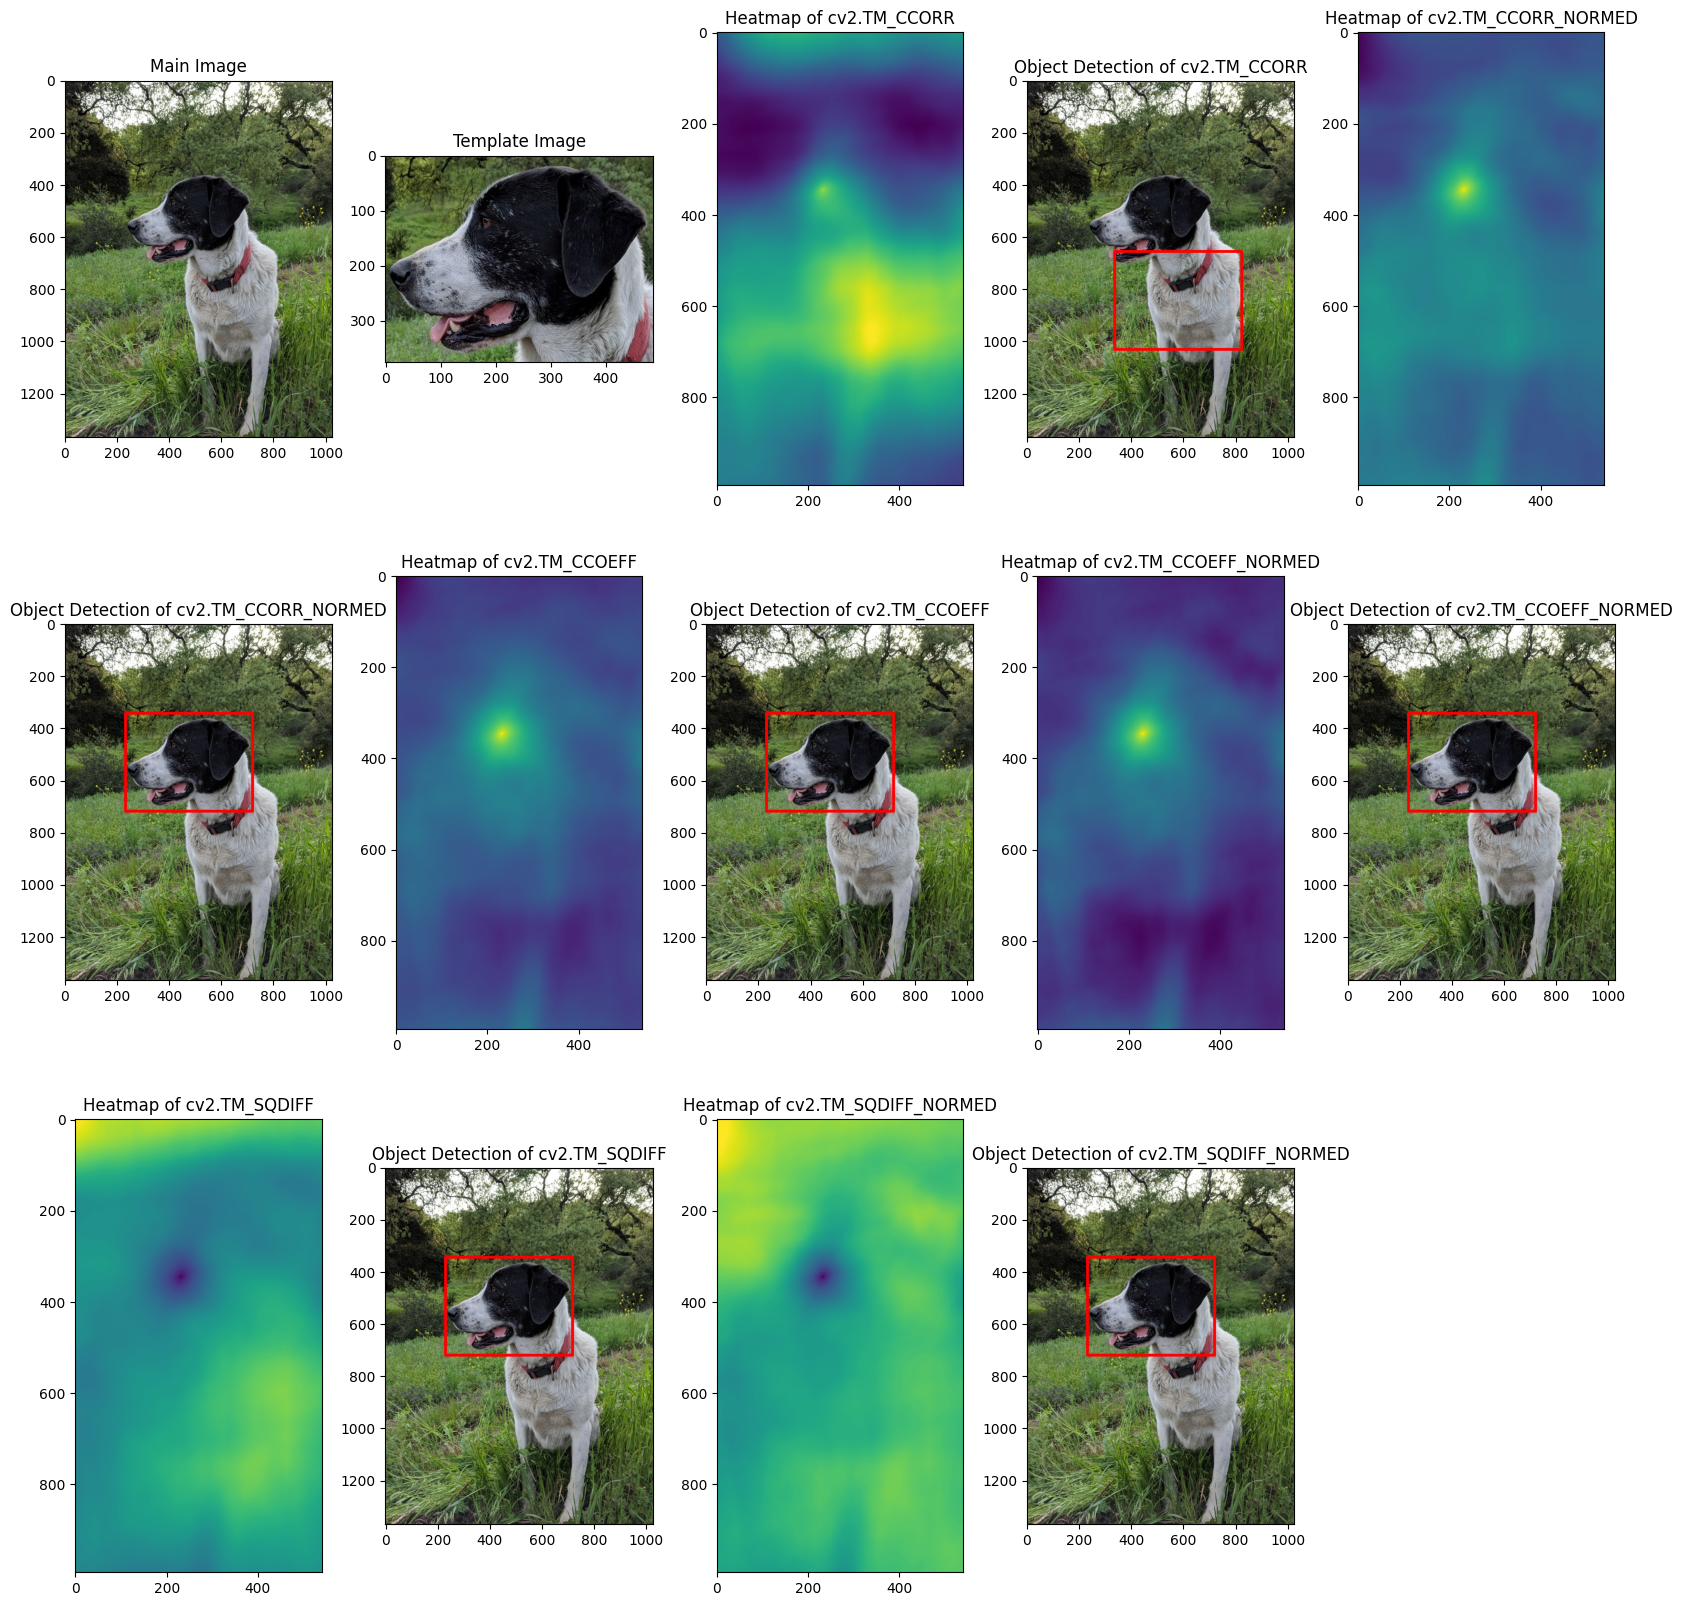

In [10]:
 # Template Matching - searching and finding the location of a template image in a larger image.

# Prepare the network
fig = plt.figure(figsize=(20,20))
rows = 3
cols = 5
num = 0

def display_img(img,title):
    global num
    num += 1
    ax = fig.add_subplot(rows, cols, num)
    ax.imshow(img)
    ax.set_title(title)

# Read Images
large_img = cv2.imread('sammy.jpg')
large_img = cv2.cvtColor(large_img, cv2.COLOR_BGR2RGB)
display_img(large_img, 'Main Image')

temp_img = cv2.imread('sammy_face.jpg')
temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
display_img(temp_img, 'Template Image')


# Comparison methods in OpenCV
methods = ['cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    # Create a copy of image
    copy_img = large_img.copy()
    # Template Matching
    result = cv2.matchTemplate(copy_img,temp_img, eval(meth))

    display_img(result, str('Heatmap of '+meth))

    # We can find the max and min value of heatmap to draw a rectangle on the image
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    if meth in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
        top_left = min_loc
    else:
        top_left = max_loc
    
    height, width, channels = temp_img.shape

    bottom_right = (top_left[0] + width , top_left[1] + height)

    cv2.rectangle(copy_img, top_left, bottom_right,(255,0,0),10)

    display_img(copy_img, str('Object Detection of '+meth))